## CSCI S-89, Introduction to Deep Learning

Homework 1, problem 1

Mark Carlebach

Due:  June 28, 2020

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data, clean in data, extract features and response variable
df = pd.read_csv("Housing_Data.csv")
badrows = df.index[df['floorArea'] == "sqft"].tolist()
df.drop(badrows, inplace=True)
floor_area = pd.to_numeric(df.floorArea).to_numpy()
bedrooms = df.bedrooms.to_numpy()
price = floor_area * pd.to_numeric(df.pricePerSqFt).to_numpy()
assert floor_area.shape[0] == price.shape[0]
assert bedrooms.shape[0] == price.shape[0]

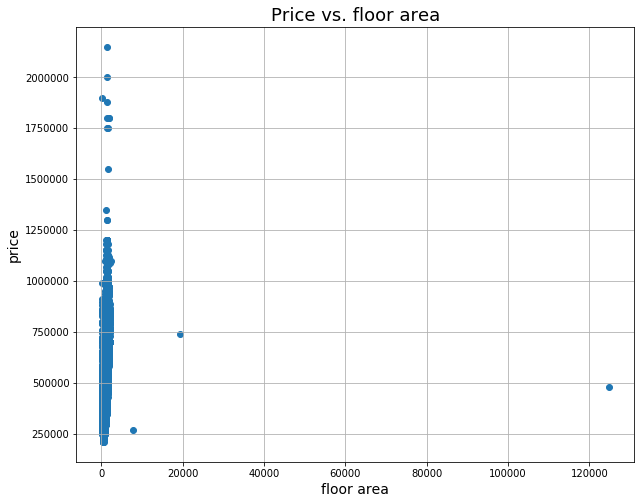

In [3]:
# Look at data before we model
# Plot price vs. floor area
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title("Price vs. floor area", fontsize=18)
ax.set_xlabel("floor area", fontsize=14)
ax.set_ylabel("price", fontsize=14)
ax.scatter(floor_area, price)
ax.grid(True)
plt.show()

In [4]:
# Drop observations with floor area > 7500
idx = np.where(floor_area > 7500)
floor_area = np.delete(floor_area, idx)
bedrooms = np.delete(bedrooms, idx)
price = np.delete(price, idx)

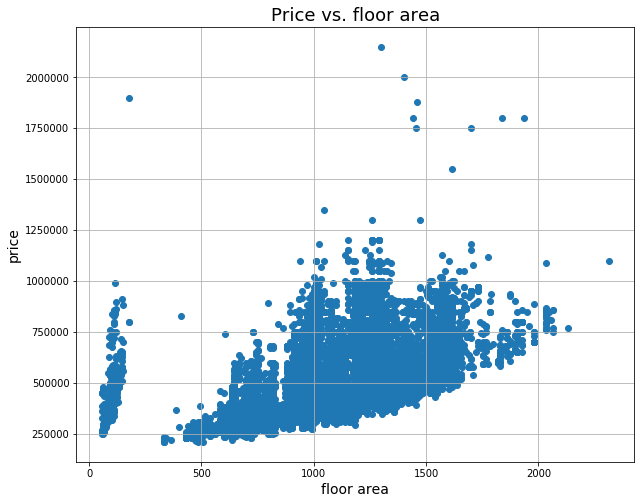

In [5]:
# Look again
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title("Price vs. floor area", fontsize=18)
ax.set_xlabel("floor area", fontsize=14)
ax.set_ylabel("price", fontsize=14)
ax.scatter(floor_area, price)
ax.grid(True)
plt.show()

In [6]:
# Put data into X & y numpy arrays and scale
scaler = StandardScaler()
X = np.zeros([price.shape[0], 2])
X[:,0] = floor_area
X[:,1] = bedrooms
scaler.fit(X)
X = scaler.transform(X)
y = price / 1000

# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=89)

In [7]:
# Create NN model
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='linear'))
print(model.summary())

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error",
              optimizer=opt)

# Fit the model
epochs = 200
history = model.fit(X_train, y_train, epochs=epochs,
                    batch_size=128,
                    verbose=0,
                    validation_data=(X_test, y_test))

W0624 09:13:13.807384 140319988426560 deprecation.py:506] From /home/mjcarleb/anaconda3/envs/ml_base/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


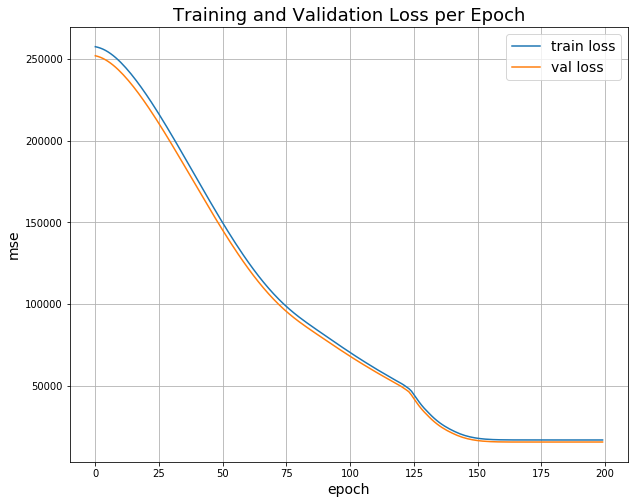

In [8]:
# Plot results
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title("Training and Validation Loss per Epoch", fontsize=18)
ax.set_xlabel("epoch", fontsize=14)
ax.set_ylabel("mse", fontsize=14)
ax.plot(history.history["loss"], label = "train loss")
ax.plot(history.history["val_loss"], label = "val loss")
ax.legend(fontsize=14)
ax.grid(True)
plt.show()

In [9]:
# Calcluate mean of prices
price_mean = price.mean() / 1000

# Calculate rmse
rmse = np.min(history.history["val_loss"]) ** .5

# Show how good our ability to predict is
print(f"Mean price:  ${price_mean :3.0f},000")
print(f"RMSE:  ${rmse :3.0f},000")

Mean price:  $481,000
RMSE:  $125,000
